In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as MVN
from numpy import zeros, eye
from scipy.optimize import fsolve
from numpy.linalg import norm, solve

from utils import prep_contour

In [3]:
z = -4.0
xlims = [-6, 6]
ylims = [-2, 2]
step = 0.01
figsize = 7
Σ = np.array([[4.0, 0.0], [0.0, 0.5]])
targetMVN = MVN(zeros(2), Σ)
f = targetMVN.logpdf
g = lambda x: - solve(Σ, x)
B = 5
δ = 1.7

In [4]:
def find_point(xval):
    y_init = 2.0
    y_opt = fsolve(lambda yval: targetMVN.logpdf([xval, yval]) - z, y_init)
    return np.array([xval, *y_opt])

ξ0 = find_point(-1)
v0 = np.array([1.3, 0.5]) #np.array([1.2, -0.5])

def tangentialize(v, x):
    ghat = g(x) / norm(g(x))
    vnew = v - ghat * (ghat @ v)
    return vnew * norm(v) / norm(vnew)

In [5]:
def hug_points_arrows_grads(ξ0, v0, grad_func, δ=1.0, B=3):
    ξ = ξ0
    v = v0
    ξ_manifold = ξ
    velocities = (δ/2)*v
    midpoints  = []
    gradients  = []
    allpoints  = ξ
    for b in range(B):
        ξ = ξ + (δ/2)*v
        midpoints.append(ξ)
        allpoints = np.vstack((allpoints, ξ))
        ghat = grad_func(ξ) / norm(grad_func(ξ))
        gradients.append(ghat)
        v = v - 2*ghat*(ghat @ v)
        ξ = ξ + (δ/2)*v
        ξ_manifold = np.vstack((ξ_manifold, ξ))
        velocities = np.vstack((velocities, (δ/2)*v))
        allpoints  = np.vstack((allpoints, ξ))
    return ξ_manifold, velocities, np.vstack(midpoints), np.vstack(gradients), allpoints

In [6]:
ξ_manifold, velocities, midpoints, gradients, allpoints = hug_points_arrows_grads(ξ0, v0, g, δ=δ, B=B)

In [7]:
ξ_manifold2, velocities2, midpoints2, gradients2, allpoints2 = hug_points_arrows_grads(ξ0, tangentialize(v0, ξ0), g, δ=δ, B=B)

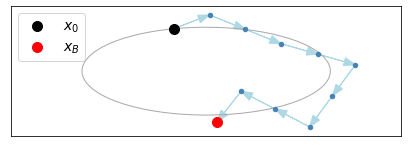

In [12]:
fig, ax = plt.subplots(figsize=(figsize, figsize))
ax.contour(*prep_contour(xlims, ylims, step, f), levels=[z], colors='darkgrey', linestyles='solid', linewidths=1.0)
MAIN_HUG = 'steelblue'
SECOND_HUG = 'lightblue'
ax.scatter(*ξ_manifold.T, s=20, zorder=100, color=MAIN_HUG)
ax.scatter(*midpoints.T, s=20, zorder=100, color=MAIN_HUG)
for ix, v in enumerate(velocities):
    if ix == 0:
        ax.arrow(*ξ_manifold[0], *velocities[0], length_includes_head=True, head_width=0.25, head_length=0.35, color=SECOND_HUG)
    elif ix < len(velocities)-1:
        ax.arrow(*midpoints[ix-1], *velocities[ix], length_includes_head=True, head_width=0.25, head_length=0.35,color=SECOND_HUG)
        ax.arrow(*ξ_manifold[ix], *velocities[ix], length_includes_head=True, head_width=0.25,head_length=0.35, color=SECOND_HUG)
    else:
        ax.arrow(*midpoints[ix-1], *velocities[ix], length_includes_head=True, head_width=0.25, head_length=0.35, color=SECOND_HUG)
ax.scatter(*ξ_manifold[0].T, s=100, zorder=100, color='black', label=r'$x_0$')
ax.scatter(*ξ_manifold[-1].T, s=100, zorder=100, color='red', label=r'$x_B$')
ax.set_xticks([])
ax.set_yticks([])
ax.legend(prop={'family':'STIXGeneral', 'size':14})
## tangential hug
# MAIN_THUG = 'red'
# SECOND_THUG = 'navajowhite'
# ax.scatter(*ξ_manifold2.T, s=50, zorder=100, color=MAIN_THUG)
# ax.scatter(*midpoints2.T, s=50, color=SECOND_THUG)
# for ix, v in enumerate(velocities2):
#     if ix == 0:
#         ax.arrow(*ξ_manifold2[0], *velocities2[0], length_includes_head=True, head_width=0.1, color=SECOND_THUG)
#     elif ix < len(velocities2)-1:
#         ax.arrow(*midpoints2[ix-1], *velocities2[ix], length_includes_head=True, head_width=0.1, color=SECOND_THUG)
#         ax.arrow(*ξ_manifold2[ix], *velocities2[ix], length_includes_head=True, head_width=0.1, color=SECOND_THUG)
#     else:
#         ax.arrow(*midpoints2[ix-1], *velocities2[ix], length_includes_head=True, head_width=0.1, color=SECOND_THUG)
# ax.scatter(*ξ_manifold2[0].T, s=50, zorder=100, color='black')
ax.set_aspect('equal')
#plt.savefig("figures/hug_dynamic.png", dpi=500)
plt.show()